# Welter


Updated July 25, 2016

## Compile all the photometry into a single master file.
Include all UBVRI data and uncertainties.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('ticks')

In [3]:
import pandas as pd

## Grankin et al. 2008  Data

Assign uncertainty in $V$ for the Grankin data.
From Grankin et al. 2008: 
> The rms error of a single measurement in the instrumental system for a star brighter than 12 mag in $V$ is about 0.01 in $BVR$ and 0.05 in $U$.

In [4]:
gr_data = pd.read_csv('../data/photometry/LkCa4_grankin.dat')

In [5]:
gr_data['Bmag']=gr_data['B_V']+gr_data['Vmag']
gr_data['Rmag']=gr_data['Vmag']-gr_data['V_R']
gr_data['Umag']=gr_data['U_B']+gr_data['Bmag']

In [6]:
gr_data['Berr']=0.01
gr_data['Verr']=0.01
gr_data['Rerr']=0.01
gr_data['Uerr']=0.05

In [7]:
gr_data['date_type'], gr_data['source'], gr_data['n_obs'] = 'HJD', 'Grankin et al. 2008', 1.0

gr_data = gr_data.rename(columns={"HJD":"JD_like"})

In [8]:
gr_data.drop(['U_B', 'B_V', 'V_R'], axis=1, inplace=True)

In [9]:
gr_data.head()

,JD_like,Vmag,Bmag,Rmag,Umag,Berr,Verr,Rerr,Uerr,date_type,source,n_obs
0,2.448858e+06,12.613,14.054,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
1,2.448859e+06,12.336,13.736,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
2,2.448860e+06,12.702,14.183,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
3,2.448861e+06,12.696,14.114,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0
4,2.448862e+06,12.334,13.743,NaN,NaN,0.01,0.01,0.01,0.05,HJD,Grankin et al. 2008,1.0


## Use Aggregated ASASSN Data

In [10]:
fn = '../data/photometry/LkCa4_ASASSN_aggregated.dat'
dat = pd.read_csv(fn)

In [11]:
dat['date_type'], dat['source'] = 'JD', 'ASASSN'
dat = dat.rename(columns={"mean_mag":"Vmag", "stddev":"Verr", "JD":"JD_like"})

In [12]:
dat.head()

,JD_like,Vmag,Verr,n_obs,date_type,source
0,2.455947e+06,12.84,0.01,1.0,JD,ASASSN
1,2.455947e+06,12.75,0.01,1.0,JD,ASASSN
2,2.455951e+06,12.65,0.01,1.0,JD,ASASSN
3,2.455951e+06,12.64,0.01,1.0,JD,ASASSN
4,2.455953e+06,13.04,0.01,2.0,JD,ASASSN


## Donati et al. 2014 data

Update Friday, July 29, 2016-- use Donati et al. 2014 Table 2.  `LkCa4_2013_grankin_bonus.dat` is now deprecated because it excluded $V$ and $R$.    
Annoying fact-- I had to retrieve the table from the latex source on astroph because MNRAS is paywalled.  #OpenScience

In [13]:
d14_cols = ['Date', 'HJD_2456000', 'Vmag', 'B_V', 'V_R', 'Phase']

In [14]:
donati14 = pd.read_csv('../data/photometry/LkCa4_donati2014.dat', sep='&', comment='\\', names=d14_cols, skiprows=1)

In [15]:
donati14['JD_like'] = donati14['HJD_2456000']+2456000.0
donati14['date_type'] = 'HJD'
donati14['Bmag'] = donati14.B_V + donati14.Vmag
donati14['Rmag'] = donati14.Vmag - donati14.V_R
donati14['Verr'], donati14['Berr'], donati14['Rerr'] = 0.01, 0.01, 0.01
donati14['source'] = 'Donati et al. 2014'

In [16]:
donati14.drop(['Date', 'HJD_2456000', 'B_V', 'V_R'], axis=1, inplace=True)

In [17]:
donati14.head()

,Vmag,Phase,JD_like,date_type,Bmag,Rmag,Verr,Berr,Rerr,source
0,12.780,0.016,2.456538e+06,HJD,14.249,11.349,0.01,0.01,0.01,Donati et al. 2014
1,12.819,0.971,2.456548e+06,HJD,14.315,11.398,0.01,0.01,0.01,Donati et al. 2014
2,12.942,0.877,2.456578e+06,HJD,14.449,11.482,0.01,0.01,0.01,Donati et al. 2014
3,12.821,0.615,2.456594e+06,HJD,14.172,11.381,0.01,0.01,0.01,Donati et al. 2014
4,12.699,0.209,2.456596e+06,HJD,14.108,11.279,0.01,0.01,0.01,Donati et al. 2014


## *new* Grankin unpublished data from 2016  
This data comes from an email responce from Grankin to GJH and MGS on July 29, 2016 titled "LkCa 4 data?".
>I have continued some observations of LkCa 4 from August, 15th 2015 till 
March, 15th 2016. These data are not published.  
--Grankin

In [18]:
#! head -n 20 ../data/photometry/lkca04_2015_grankin.txt

I'll assume that `JDH2400000` means HJD-2400000, which is the system he uses in his other papers.

In [19]:
gr_new_cols = ['Name', 'JDH2400000',  'Vmag', 'B-V','V-Rj', 'V-Ij', 'Telesc', 'Observer', 'dd-mmm-yyyy']

In [20]:
gr_new = pd.read_csv('../data/photometry/lkca04_2015_grankin.txt', na_values='9.999',
                     delim_whitespace=True, comment=';', names=gr_new_cols, )

In [21]:
gr_new['JD_like'] = gr_new['JDH2400000']+2400000.0
gr_new['date_type'] = 'HJD'
gr_new['Bmag'] = gr_new['B-V'] + gr_new.Vmag
gr_new['Rmag'] = gr_new.Vmag - gr_new['V-Rj']
gr_new['Verr'], gr_new['Berr'], gr_new['Rerr'] = 0.01, 0.01, 0.01
gr_new['source'] = 'Grankin unpublished'

In [22]:
gr_new.drop(['Name', 'JDH2400000', 'B-V', 'V-Rj', 'V-Ij', 'dd-mmm-yyyy', 'Telesc', 'Observer'], axis=1, inplace=True)

In [23]:
gr_new.head()

,Vmag,JD_like,date_type,Bmag,Rmag,Verr,Berr,Rerr,source
0,12.732,2.457251e+06,HJD,NaN,11.248,0.01,0.01,0.01,Grankin unpublished
1,12.740,2.457252e+06,HJD,14.204,11.272,0.01,0.01,0.01,Grankin unpublished
2,13.066,2.457253e+06,HJD,14.613,11.527,0.01,0.01,0.01,Grankin unpublished
3,12.794,2.457261e+06,HJD,14.220,11.348,0.01,0.01,0.01,Grankin unpublished
4,13.108,2.457266e+06,HJD,NaN,11.634,0.01,0.01,0.01,Grankin unpublished


## Integral OMC

In [24]:
omc = pd.read_csv('../data/photometry/LkCa4_Integral_OMC.csv')

In [25]:
omc['date_type'] = 'HJD'
omc['source'] = 'Integral-OMC'
omc.rename(columns={'HJD':'JD_like'}, inplace=True)

In [26]:
omc.head()

,JD_like,Vmag,Verr,date_type,source
0,2.453949e+06,13.007421,0.029357,HJD,Integral-OMC
1,2.453949e+06,13.036949,0.030502,HJD,Integral-OMC
2,2.453949e+06,13.053765,0.032617,HJD,Integral-OMC
3,2.453949e+06,13.032140,0.030567,HJD,Integral-OMC
4,2.453949e+06,12.923807,0.034285,HJD,Integral-OMC


## Herbst and Shevchenko 1999
(Really the data is from Vrba et al. 1993 and Bouvier et al. 1993.)

In [27]:
hs99 = pd.read_csv('../data/photometry/LkCa4_herbst99.dat')

In [28]:
hs99.drop(['U-B','B-V','V-R','R-I', 'Note', 'Ref'], axis=1, inplace=True)

In [29]:
hs99['Verr'], hs99['Berr'], hs99['Rerr'], hs99['Ierr'],hs99['Uerr'] = 0.01,0.01,0.01,0.01,0.05

In [30]:
hs99['date_type'] = 'JD'
hs99.rename(columns={'JD':'JD_like'}, inplace=True)

In [31]:
hs99.head()

,JD_like,Vmag,Bmag,Rmag,Imag,Umag,source,Verr,Berr,Rerr,Ierr,Uerr,date_type
0,2446357.450,12.67,14.12,11.71,10.70,15.32,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
1,2446358.808,12.47,13.94,11.55,10.56,15.15,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
2,2446359.001,12.49,13.97,11.57,10.58,15.18,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
3,2446361.961,12.46,13.92,11.53,10.53,15.11,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD
4,2446362.763,12.56,14.03,11.64,10.66,15.31,Vrba et al. 1993,0.01,0.01,0.01,0.01,0.05,JD


## ASAS3

In [32]:
as3 = pd.read_csv('../data/photometry/LkCa4_asas3.csv')

In [33]:
as3.head()

,JD_like,date_type,Vmag,Verr,source
0,2.452661e+06,HJD,13.019,0.054,ASAS3
1,2.452878e+06,HJD,13.049,0.037,ASAS3
2,2.452916e+06,HJD,12.881,0.034,ASAS3
3,2.452934e+06,HJD,13.068,0.029,ASAS3
4,2.452946e+06,HJD,12.645,0.038,ASAS3


## AAVSO

In [34]:
names = ['JD_like', 'Bmag', 'Imag','Rmag','Vmag','Berr', 'Ierr', 'Rerr', 'Verr']

In [35]:
aav = pd.read_csv('../data/photometry/LkCa4_aavso.csv', skiprows=[0,1,2], names=names)

In [36]:
aav['date_type'] = 'JD'
aav['source'] = 'AAVSO'

#### Aside: mis-classified R-band data from errant filter curve assumption

In [37]:
#plt.plot(master.Vmag, master.Vmag-master.Rmag, '.')

In [38]:
#vec = master.Vmag - master.Rmag

In [39]:
#sns.distplot(vec[(master.Rmag==master.Rmag) & (master.Vmag==master.Vmag)], rug=True)

**TODO**: we need to figure out the photometric filters here.  
Let's leave it out for now...

In [40]:
#bi = vec < 1.05

In [41]:
#bi.sum()

In [42]:
#master.source[bi].unique()

In [43]:
#master.Rmag[bi], master.Rerr[bi]= np.NaN, np.NaN

It's the Vrba and Bouvier data that is off, not the AAVSO data.

In [44]:
aav.head()

,JD_like,Bmag,Imag,Rmag,Vmag,Berr,Ierr,Rerr,Verr,date_type,source
0,2.456651e+06,14.285,NaN,NaN,NaN,0.021,NaN,NaN,NaN,JD,AAVSO
1,2.456651e+06,NaN,NaN,NaN,12.648,NaN,NaN,NaN,0.009,JD,AAVSO
2,2.456651e+06,NaN,NaN,11.608,NaN,NaN,NaN,0.006,NaN,JD,AAVSO
3,2.456651e+06,NaN,10.549,NaN,NaN,NaN,0.007,NaN,NaN,JD,AAVSO
4,2.456651e+06,NaN,NaN,NaN,13.090,NaN,NaN,NaN,0.010,JD,AAVSO


## Concatenate all photometry into a "database"

In [45]:
master = pd.concat([dat, gr_data, donati14, gr_new, omc, hs99, as3, aav], join='outer', ignore_index=True, axis=0)

In [46]:
master.head()

,Berr,Bmag,Ierr,Imag,JD_like,Phase,Rerr,Rmag,Uerr,Umag,Verr,Vmag,date_type,n_obs,source
0,NaN,NaN,NaN,NaN,2.455947e+06,NaN,NaN,NaN,NaN,NaN,0.01,12.84,JD,1.0,ASASSN
1,NaN,NaN,NaN,NaN,2.455947e+06,NaN,NaN,NaN,NaN,NaN,0.01,12.75,JD,1.0,ASASSN
2,NaN,NaN,NaN,NaN,2.455951e+06,NaN,NaN,NaN,NaN,NaN,0.01,12.65,JD,1.0,ASASSN
3,NaN,NaN,NaN,NaN,2.455951e+06,NaN,NaN,NaN,NaN,NaN,0.01,12.64,JD,1.0,ASASSN
4,NaN,NaN,NaN,NaN,2.455953e+06,NaN,NaN,NaN,NaN,NaN,0.01,13.04,JD,2.0,ASASSN


## Convert Julian Dates to year, month, day

From JiffyClub's [gist](https://gist.github.com/jiffyclub/1294443):

In [47]:
import math
import datetime as dt

In [48]:
@np.vectorize
def jd_to_date(jd):
    """
    Convert Julian Day to date.
    
    Algorithm from 'Practical Astronomy with your Calculator or Spreadsheet', 
        4th ed., Duffet-Smith and Zwart, 2011.
    
    Parameters
    ----------
    jd : float
        Julian Day
        
    Returns
    -------
    year : int
        Year as integer. Years preceding 1 A.D. should be 0 or negative.
        The year before 1 A.D. is 0, 10 B.C. is year -9.
        
    month : int
        Month as integer, Jan = 1, Feb. = 2, etc.
    
    day : float
        Day, may contain fractional part.
        
    Examples
    --------
    Convert Julian Day 2446113.75 to year, month, and day.
    
    >>> jd_to_date(2446113.75)
    (1985, 2, 17.25)
    
    """
    jd = jd + 0.5
    
    F, I = math.modf(jd)
    I = int(I)
    
    A = math.trunc((I - 1867216.25)/36524.25)
    
    if I > 2299160:
        B = I + 1 + A - math.trunc(A / 4.)
    else:
        B = I
        
    C = B + 1524
    
    D = math.trunc((C - 122.1) / 365.25)
    
    E = math.trunc(365.25 * D)
    
    G = math.trunc((C - E) / 30.6001)
    
    day = C - E + F - math.trunc(30.6001 * G)
    
    if G < 13.5:
        month = G - 1
    else:
        month = G - 13
        
    if month > 2.5:
        year = D - 4716
    else:
        year = D - 4715
        
    return year, month, day
    

In [49]:
master['year'], master['month'], master['day'] = jd_to_date(master.JD_like.values)

# Break the observations into **seasons**
Seasons are divided by their observability (can't observe towards the sun!):

In [50]:
#sns.distplot(dat.month, rug=True, bins=np.arange(0,12,1))

In [51]:
#sns.distplot(gr_data.month, rug=True, bins=np.arange(0,12,1))

May is the dividing line (makes sense, the sun is in Taurus in May... e.g. my birthday is May 6th and I am a Taurus).

In [52]:
def assign_season(df):
    '''takes in a dataFrame possessing year and month, appends a season column.
    '''
    df['season'] = df.year - 1985
    next_ids = df.month > 5
    df.season[next_ids] += 1
    return df

In [53]:
master = assign_season(master)

In [54]:
master = master[['JD_like', 'year', 'month', 'day', 'season', 
                'Vmag', 'Verr', 'Bmag', 'Berr', 'Rmag', 'Rerr', 'Umag', 'Uerr',
                 'source', 'date_type']]

Make sure uncertainties are NaN if mag is NaN.

In [55]:
master.Verr[master.Vmag != master.Vmag] = np.NaN
master.Rerr[master.Rmag != master.Rmag] = np.NaN
master.Berr[master.Bmag != master.Bmag] = np.NaN
master.Uerr[master.Umag != master.Umag] = np.NaN

In [56]:
master.source.unique()

array(['ASASSN', 'Grankin et al. 2008', 'Donati et al. 2014',
       'Grankin unpublished', 'Integral-OMC', 'Vrba et al. 1993',
       'Bouvier et al. 1993', 'ASAS3', 'AAVSO'], dtype=object)

In [57]:
#this_source = 'Grankin et al. 2008'
this_source = 'Vrba et al. 1993'
this_source = 'Grankin unpublished'

In [58]:
#master[master.source == this_source]['year'].describe()

In [59]:
#master[master.source == this_source].describe().loc['count']

In [60]:
#master.count()

## Metadata for observing "seasons"

Estimate the period separately for each season:

In [61]:
seasons_unsorted = master.season.unique()
seasons_unsorted.sort()
seasons = seasons_unsorted

In [62]:
max_peaks = np.array([3.375]*22)
P_errs = np.array([0.003]*22)

In [63]:
season_agg = pd.DataFrame({"season":seasons,
                           "P_est1":max_peaks,
                           "P_err1":P_errs})

Add some metadata:

In [64]:
season_agg['years'] = ''
season_agg['N_obs'] = 0
season_agg['JD_min'] = 0.0
season_agg['JD_max'] = 0.0
season_agg['N_U'] = 0
season_agg['N_B'] = 0
season_agg['N_V'] = 0
season_agg['N_R'] = 0

In [65]:
for i in range(22):
    # get the data and best-fit angular frequency
    s = season_agg.season[i]
    ids = master.season == s
    df = master[ids]
    season_agg.years[i] = "{}/{}-{}/{}".format(df.month[df.JD_like.argmin()],
                                               df.year.min(), 
                                               df.month[df.JD_like.argmax()],
                                               df.year.max())
    season_agg.N_obs[i] = len(df.Vmag)
    season_agg.JD_min[i] = df.JD_like.min()
    season_agg.JD_max[i] = df.JD_like.max()
    season_agg.N_U[i] = (df.Umag == df.Umag).sum()
    season_agg.N_B[i] = (df.Bmag == df.Bmag).sum()
    season_agg.N_V[i] = (df.Vmag == df.Vmag).sum()
    season_agg.N_R[i] = (df.Rmag == df.Rmag).sum()

In [66]:
season_agg['length'] = np.ceil(season_agg.JD_max-season_agg.JD_min)

In [67]:
season_agg.head()

,P_err1,P_est1,season,years,N_obs,JD_min,JD_max,N_U,N_B,N_V,N_R,length
0,0.003,3.375,1,10/1985-3/1986,29,2.446357e+06,2.446519e+06,22,29,29,29,162.0
1,0.003,3.375,6,11/1990-1/1991,26,2.448212e+06,2.448272e+06,26,26,26,26,61.0
2,0.003,3.375,8,8/1992-12/1992,29,2.448858e+06,2.448960e+06,0,29,29,15,102.0
3,0.003,3.375,9,8/1993-10/1993,34,2.449215e+06,2.449284e+06,1,30,34,33,69.0
4,0.003,3.375,10,8/1994-12/1994,12,2.449581e+06,2.449697e+06,1,12,12,12,116.0


## Metadata for observing "epochs"

In [68]:
epochs = pd.read_csv('../data/epochs.csv').dropna(axis=0, how='all').dropna(axis=1, how='all')

Associate each epoch with the closest season

In [69]:
epochs['InSeason'] = np.NaN
epochs['NearSeason'] = np.NaN
epochs['dist_hi'] = np.NaN
epochs['dist_lo'] = np.NaN
epochs['season_hi'] = np.NaN
epochs['season_lo'] = np.NaN

In [70]:
for i in range(len(epochs)):
    sid = (season_agg.JD_min < epochs.JD_like[i]) & (season_agg.JD_max > epochs.JD_like[i])
    if sid.sum()==1:
        epochs.InSeason[i] = season_agg.season[sid]
    else:
        dist_lo = np.abs(epochs.JD_like[i]-season_agg.JD_min)
        dist_hi = np.abs(epochs.JD_like[i]-season_agg.JD_max) 
        s_hi = np.argmin(dist_hi)
        s_lo = s_hi+1
        epochs.season_hi[i] = season_agg.season[s_hi]
        epochs.season_lo[i] = season_agg.season[s_lo]
        epochs.dist_hi[i] = np.ceil(dist_hi[s_hi])
        epochs.dist_lo[i] = np.ceil(dist_lo[s_lo])

All of the epochs that were missed come just-after the end of the season by between 22 to 126 days.

In [71]:
epochs.NearSeason = epochs.season_hi

In [72]:
epochs['AdoptedSeason'] = epochs.InSeason
out_of_season = epochs.InSeason != epochs.InSeason
epochs.AdoptedSeason[out_of_season] = epochs.NearSeason[out_of_season]

Placeholders for BVR magnitude estimates:

In [73]:
epochs['B_est'], epochs['V_est'], epochs['R_est'] = 0.0, 0.0, 0.0

In [74]:
epochs['JD-2450000'] = epochs.JD_like-2450000.0

We don't want to label everything we know about:

In [75]:
epochs.drop(epochs.index[epochs.Observation.isin(
            ['Nguyen_1', 'Nguyen_2', 'Nguyen_3', 'Nguyen_4','IGRINS_1'])], inplace=True)

In [76]:
epochs = epochs.reset_index(drop=True)

In [77]:
epoch_ls = pd.DataFrame(columns=['Instrument', 'color', 'linestyles'])

epoch_ls = epoch_ls.append({"Instrument":'ESPaDOnS', "color":'gray', 'linestyles':'dotted'}, ignore_index=True)
epoch_ls = epoch_ls.append({"Instrument":'IGRINS', "color":'black', 'linestyles':'solid'}, ignore_index=True)
epoch_ls = epoch_ls.append({"Instrument":'2MASS', "color":'red', 'linestyles':'dashed'}, ignore_index=True)
epoch_ls = epoch_ls.append({"Instrument":'DoubleSpec', "color":'blue', 'linestyles':'dotted'}, ignore_index=True)
epoch_ls = epoch_ls.append({"Instrument":'TripleSpec', "color":'blue', 'linestyles':'dashed'}, ignore_index=True)

In [78]:
epochs_orig = epochs.copy()

In [79]:
epochs = pd.merge(epochs, epoch_ls, on='Instrument')

## Lightcurve analysis

In [80]:
from astroML.time_series import multiterm_periodogram
from astroML.time_series import lomb_scargle

from scipy.signal import argrelmax

In [81]:
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit

In [82]:
from gatspy.periodic import LombScargle, LombScargleFast

In [83]:
def plot_season_postage_stamps(ylim=(13.2, 12.2), savefig_file='../results/fig/Vband_22s.pdf', ylabel='$V$'):
    '''
    Plots all the available seasons of photometry in phase-folded postage stamps.
    '''
    fig = plt.figure(figsize=(8.5, 11))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

    for i in range(22):
        # get the data and best-fit angular frequency
        s = season_agg.season[i]
        ids = master.season == s
        df = master[ids]
        t = df.JD_like.values
        y = df.Vmag.values
        dy = df.Verr.values
        #this_P = season_agg.P_est1[i]
        this_P = season_agg.P_est1.median()
        phased_t = np.mod(t, this_P)/this_P

        # Fit a multiterm model
        Nterms = 4
        reg = 0.1 * np.ones(2 * Nterms + 1)
        reg[:5] = 0 # no regularization on low-order terms
        if (df.year.min() == 2006): 
            reg = 0.3 * np.ones(2 * Nterms + 1)
            reg[:3] = 0 # no regularization on low-order terms

        modelV = LombScargle(Nterms=4, regularization=reg)
        mask = y == y # We can mask flares later on
        modelV.fit(t[mask], y[mask], dy[mask])
        tfit = np.linspace(0, this_P, 100)
        yfitV = modelV.predict(tfit, period=this_P)


        # plot the phased data
        ax = fig.add_subplot(6,4,1 + i)
        plt.plot(tfit/this_P, yfitV, alpha=0.5)
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)

        #---R-band---

        y = df.Rmag.values
        dy = df.Rerr.values
        #this_P = season_agg.P_est1[i]
        this_P = season_agg.P_est1.median()
        phased_t = np.mod(t, this_P)/this_P

        # Fit a multiterm model
        Nterms = 4
        reg = 0.1 * np.ones(2 * Nterms + 1)
        reg[:5] = 0 # no regularization on low-order terms

        ax = fig.add_subplot(6,4,1 + i)

        modelR = LombScargle(Nterms=4, regularization=reg)
        mask = y == y # We can mask flares later on
        try:
            modelR.fit(t[mask], y[mask], dy[mask])
            tfit = np.linspace(0, this_P, 100)
            yfitR = modelR.predict(tfit, period=this_P)
            plt.plot(tfit/this_P, yfitR, alpha=0.5)
        except:
            pass
            #print('Season {} did not work for some reason'.format(s))
        # plot the phased data
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        #------------


        #---B-band---

        y = df.Bmag.values
        dy = df.Berr.values
        #this_P = season_agg.P_est1[i]
        this_P = season_agg.P_est1.median()
        phased_t = np.mod(t, this_P)/this_P

        # Fit a multiterm model
        Nterms = 4
        reg = 0.1 * np.ones(2 * Nterms + 1)
        reg[:5] = 0 # no regularization on low-order terms

        ax = fig.add_subplot(6,4,1 + i)

        modelB = LombScargle(Nterms=4, regularization=reg)
        mask = y == y # We can mask flares later on
        try:
            modelB.fit(t[mask], y[mask], dy[mask])
            tfit = np.linspace(0, this_P, 100)
            yfit = modelB.predict(tfit, period=this_P)
            plt.plot(tfit/this_P, yfit, alpha=0.5)
        except:
            pass
            #print('Season {} did not work for some reason'.format(s))
        # plot the phased data
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        #------------


        #---Mark observation epochs---
        ts_ids = (np.float(s) == epochs.AdoptedSeason)
        if ts_ids.sum() > 0:
            for ei in epochs.index.values[ts_ids.values]:
                this_phase = np.mod(epochs.JD_like[ei], this_P)/this_P
                ax.vlines(this_phase, 15.3, 10.2, linestyles=epochs.linestyles[ei], 
                          colors=epochs.color[ei], alpha=0.8)
                for band, model in [('V_est', modelV), ('R_est', modelR), ('B_est', modelB)]:
                    try:
                        estimated_mag = model.predict(this_phase*this_P, period=this_P).tolist()
                        epochs.set_value(ei, band, estimated_mag)
                    except:
                        pass
                        #print('{}: Band {} could not be computed'.format(epochs.Observation[ei], band))  
        #-----------------------------


        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.set_ylim(ylim)

        ax.text(0.03, 0.96, "{}".format(season_agg.years[i]),ha='left', va='top',
                transform=ax.transAxes)

        if i < 18 :
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 4 != 0:
            ax.yaxis.set_major_formatter(plt.NullFormatter())
        if i % 4 == 0:
            ax.set_ylabel(ylabel)

        if i in (18, 19, 20, 21):
            ax.set_xlabel('phase')

    plt.savefig(savefig_file, bbox_inches='tight')

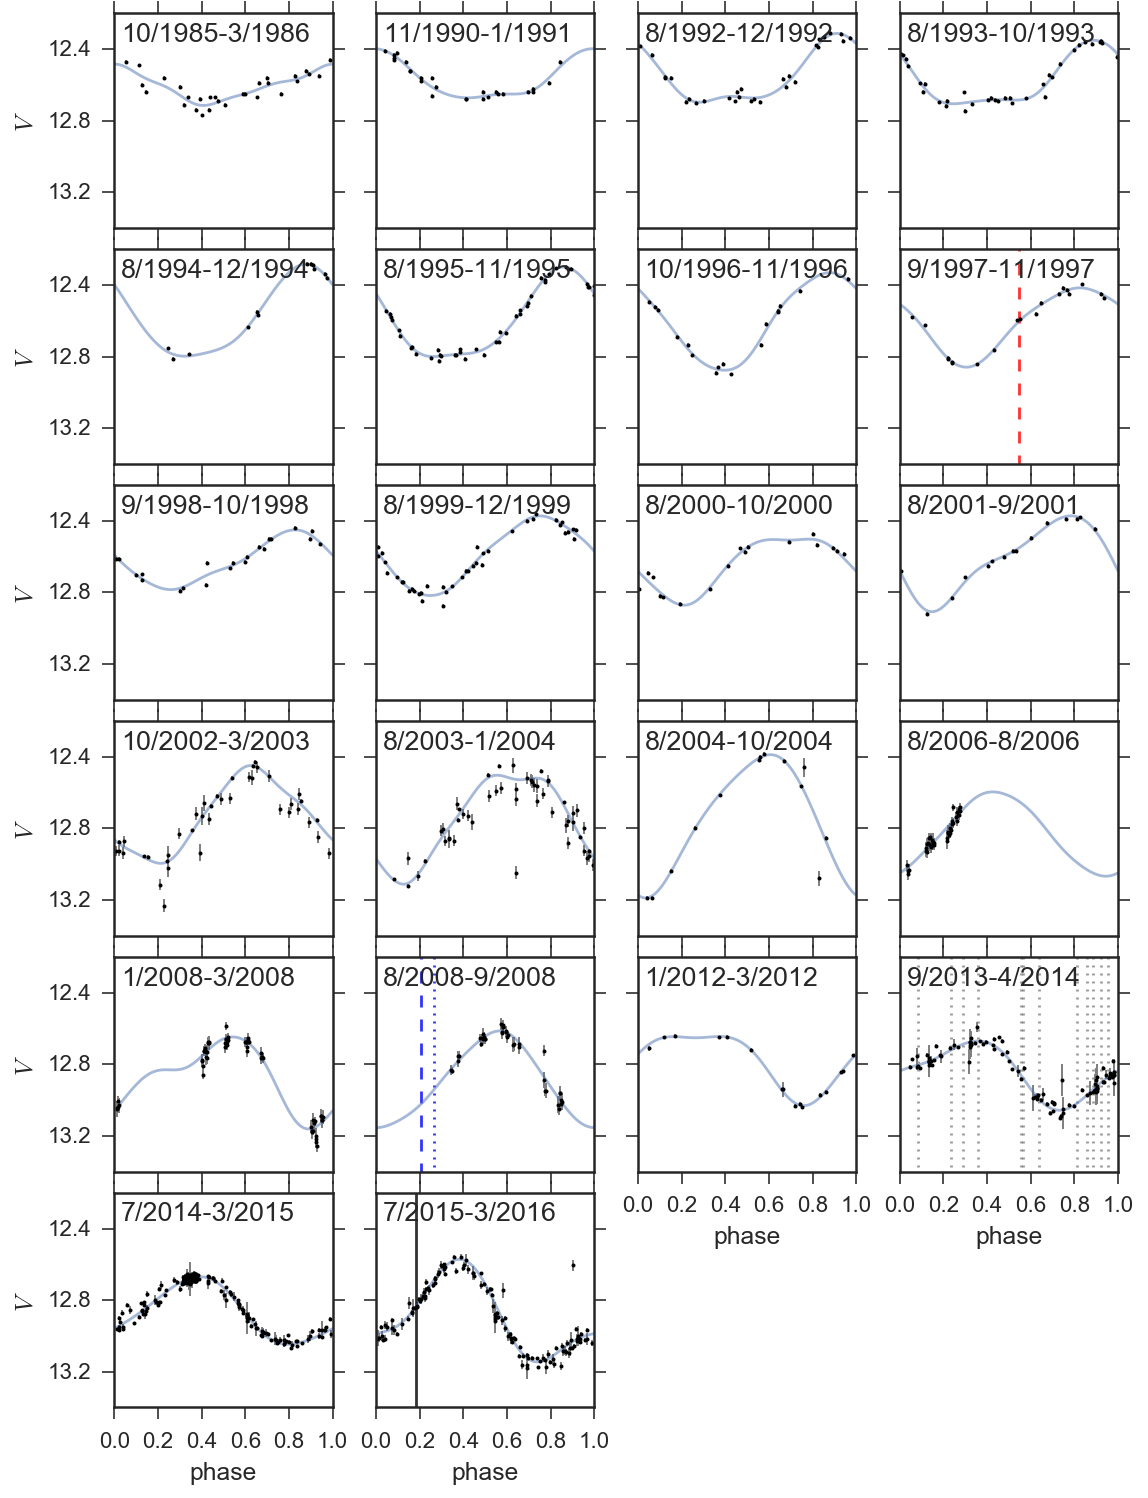

In [84]:
plot_season_postage_stamps(ylim=(13.4, 12.2), savefig_file='../results/fig/Vband_22s.pdf', ylabel='$V$')

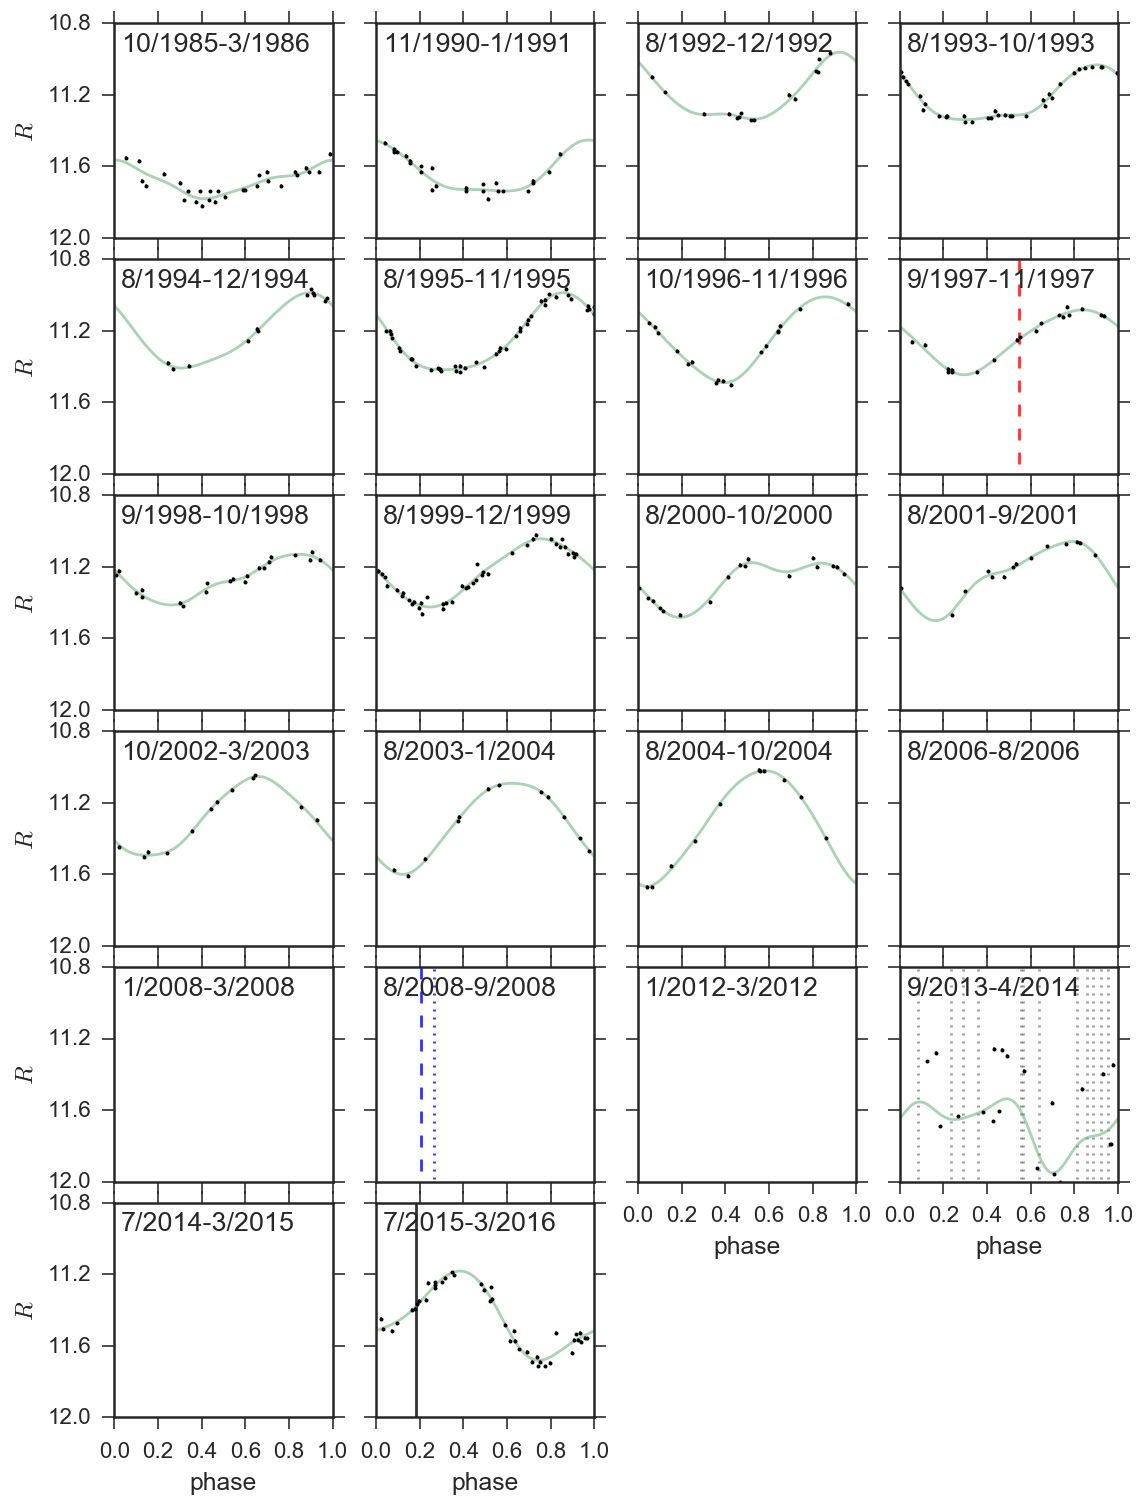

In [85]:
plot_season_postage_stamps(ylim=(12.0, 10.8), savefig_file='../results/fig/Rband_22s.pdf', ylabel='$R$')

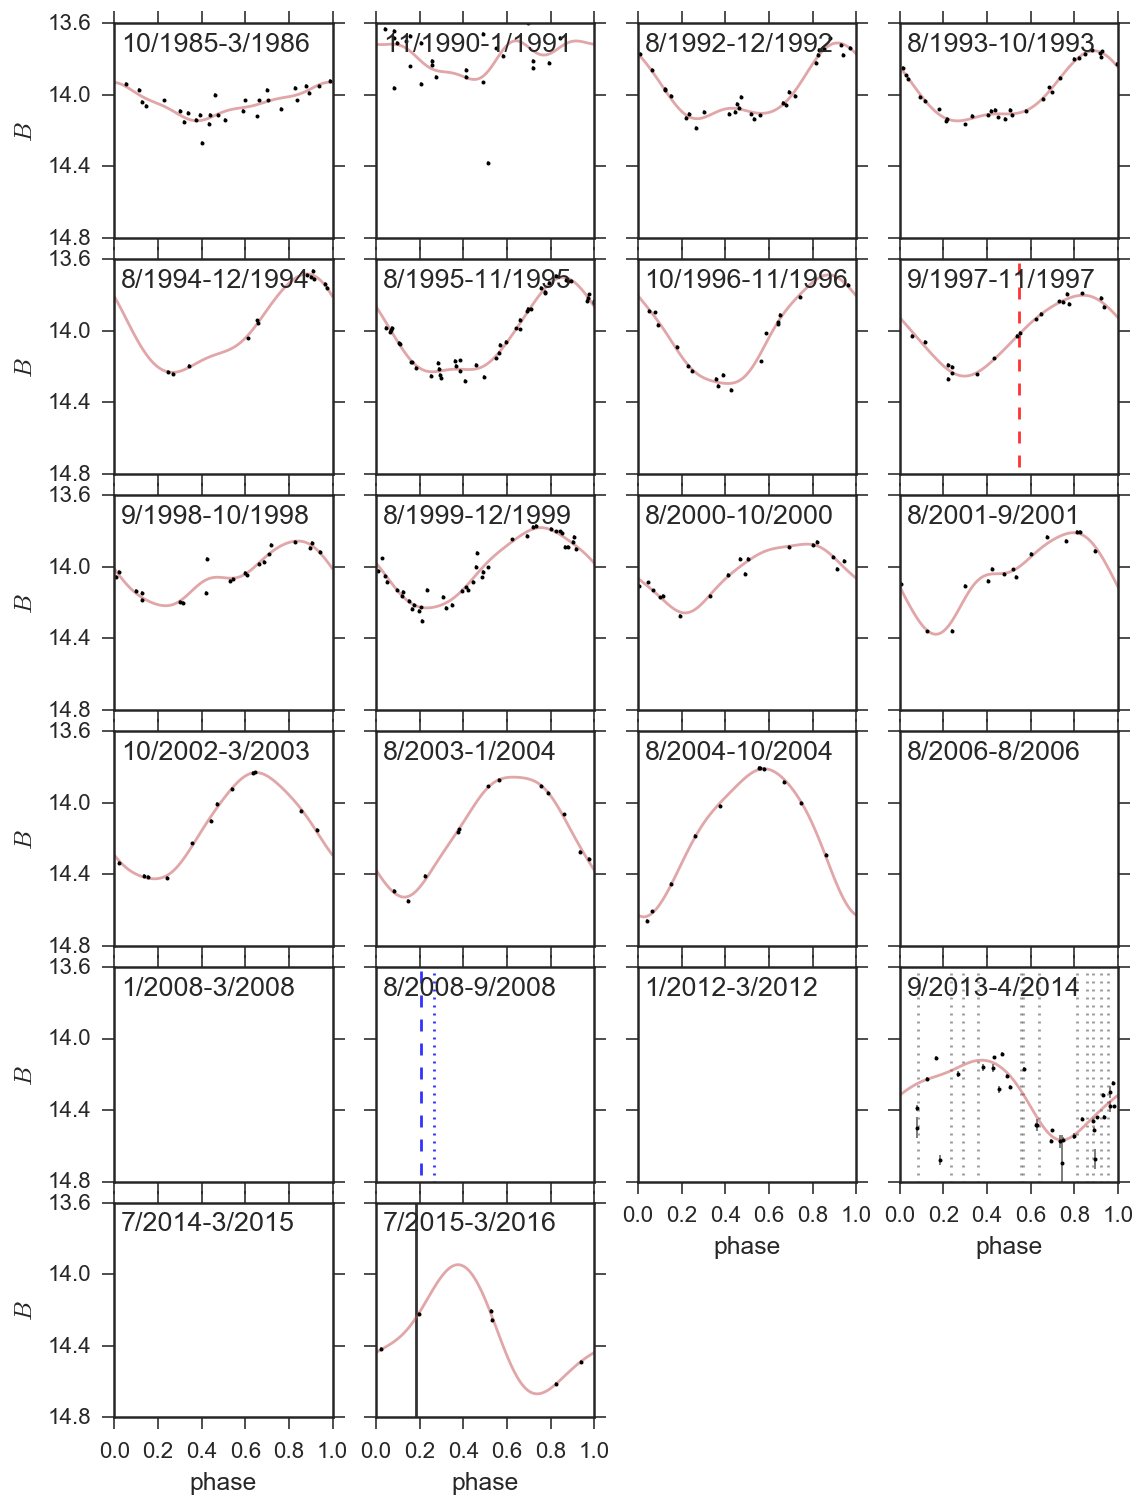

In [86]:
plot_season_postage_stamps(ylim=(14.8, 13.6), savefig_file='../results/fig/Bband_22s.pdf', ylabel='$B$')

## Summarize estimated photometry into a table

Drop the Observations that we are not using: Nguyen, IGRINS_1.  
Drop the columns we are not using (most columns).  
Add a column for JD-2456000 to match Donati et al. 2014.

In [87]:
eps = epochs.copy()

keep = ['JD-2450000','Instrument', 'B_est', 'V_est', 'R_est']
discard = set(eps.columns.values) - set(keep)
eps.drop(list(discard), axis=1, inplace=True)
eps.replace(0.0, np.NaN, inplace=True)
eps[keep]

,JD-2450000,Instrument,B_est,V_est,R_est
0,781.71060,2MASS,14.022682,12.605329,11.250059
1,4830.56369,TripleSpec,NaN,13.024335,NaN
2,4830.77189,DoubleSpec,NaN,12.940781,NaN
3,6665.72044,ESPaDOnS,14.363314,12.870791,11.711636
4,6666.85048,ESPaDOnS,14.148869,12.687990,11.645989
5,6667.77270,ESPaDOnS,14.305621,12.873431,11.625480
6,6668.86991,ESPaDOnS,14.439088,12.938918,11.745303
7,6672.89947,ESPaDOnS,14.251252,12.804548,11.555675
8,6673.84079,ESPaDOnS,14.122040,12.670068,11.615841
9,6674.77460,ESPaDOnS,14.457068,12.993301,11.853012


## Full range of data

Photometric sources:

In [88]:
master.source.unique()

array(['ASASSN', 'Grankin et al. 2008', 'Donati et al. 2014',
       'Grankin unpublished', 'Integral-OMC', 'Vrba et al. 1993',
       'Bouvier et al. 1993', 'ASAS3', 'AAVSO'], dtype=object)

In [89]:
sources = ['Vrba et al. 1993', 'Bouvier et al. 1993','Grankin et al. 2008', 'ASAS3',
           'Integral-OMC','Donati et al. 2014','ASASSN','AAVSO', 'Grankin unpublished']

In [90]:
fmts = ['s', 's', '.', '.', '.', 's', '.', '.', 'o']

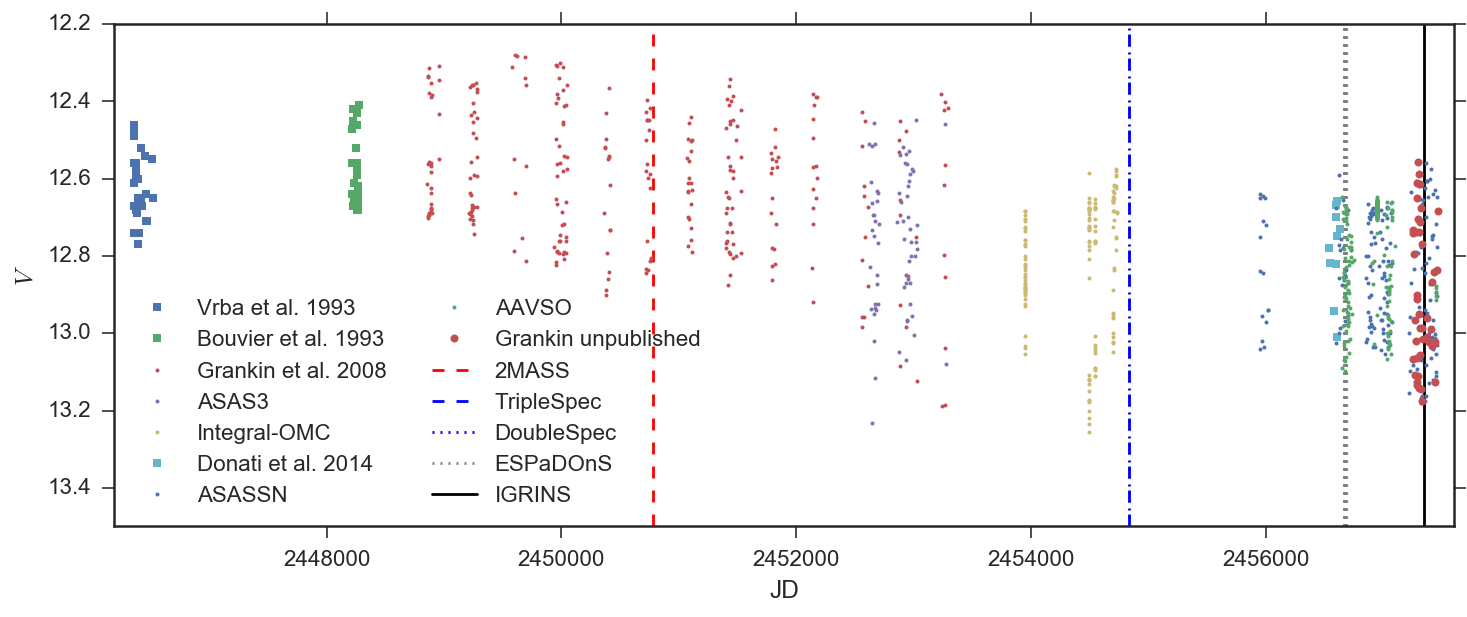

In [91]:
plt.figure(figsize=(12, 4.5))

for source, fmt in zip(sources, fmts):
    inds = master.source == source
    plt.plot(master.JD_like[inds], master.Vmag[inds], fmt, ms=4,label=source)

for i in range(len(epochs)):
    label = epochs.Instrument[i]
    if (label == 'ESPaDOnS') & (i!=6):
        label=None
    plt.vlines(epochs.JD_like[i], 13.5, 12.2, colors=epochs.color[i], 
               linestyles=epochs.linestyles[i], label = label)
    
#plt.vlines(2446192.083333, 13.5, 12.2, colors='cyan', linestyles='dashed')

legend = plt.legend(loc='best', ncol=2)#, frameon=True, shadow=False, )
plt.ylim(13.5, 12.2)

plt.ylabel('$V$')
plt.xlabel('JD')

plt.xlim(2446192.083333, 2457597.833333)
plt.savefig('../document/figures/LkCa4_phot1986-2016.pdf', bbox_inches='tight')

## Table of estimated $V$ values at the time of observations

In [92]:
eps = eps[keep]

In [93]:
eps

,JD-2450000,Instrument,B_est,V_est,R_est
0,781.71060,2MASS,14.022682,12.605329,11.250059
1,4830.56369,TripleSpec,NaN,13.024335,NaN
2,4830.77189,DoubleSpec,NaN,12.940781,NaN
3,6665.72044,ESPaDOnS,14.363314,12.870791,11.711636
4,6666.85048,ESPaDOnS,14.148869,12.687990,11.645989
5,6667.77270,ESPaDOnS,14.305621,12.873431,11.625480
6,6668.86991,ESPaDOnS,14.439088,12.938918,11.745303
7,6672.89947,ESPaDOnS,14.251252,12.804548,11.555675
8,6673.84079,ESPaDOnS,14.122040,12.670068,11.615841
9,6674.77460,ESPaDOnS,14.457068,12.993301,11.853012


In [94]:
latex_fmts = [lambda x:"{:0.4f}".format(x), lambda x:"{}".format(x), 
        lambda x:"{:0.2f}".format(x), lambda x:"{:0.2f}".format(x), lambda x:"{:0.2f}".format(x)]

In [95]:
tbl_out = eps

In [96]:
print(tbl_out.to_latex(index=False, na_rep='$\cdots$', formatters=latex_fmts))

\begin{tabular}{rlrrr}
\toprule
JD-2450000 &  Instrument & B\_est & V\_est & R\_est \\
\midrule
  781.7106 &       2MASS & 14.02 & 12.61 & 11.25 \\
 4830.5637 &  TripleSpec &   nan & 13.02 &   nan \\
 4830.7719 &  DoubleSpec &   nan & 12.94 &   nan \\
 6665.7204 &    ESPaDOnS & 14.36 & 12.87 & 11.71 \\
 6666.8505 &    ESPaDOnS & 14.15 & 12.69 & 11.65 \\
 6667.7727 &    ESPaDOnS & 14.31 & 12.87 & 11.63 \\
 6668.8699 &    ESPaDOnS & 14.44 & 12.94 & 11.75 \\
 6672.8995 &    ESPaDOnS & 14.25 & 12.80 & 11.56 \\
 6673.8408 &    ESPaDOnS & 14.12 & 12.67 & 11.62 \\
 6674.7746 &    ESPaDOnS & 14.46 & 12.99 & 11.85 \\
 6675.7396 &    ESPaDOnS & 14.40 & 12.90 & 11.73 \\
 6676.7954 &    ESPaDOnS & 14.18 & 12.72 & 11.65 \\
 6677.8699 &    ESPaDOnS & 14.29 & 12.86 & 11.61 \\
 6678.7419 &    ESPaDOnS & 14.53 & 13.02 & 11.80 \\
 6678.8950 &    ESPaDOnS & 14.47 & 12.97 & 11.75 \\
 7344.8610 &      IGRINS & 14.24 & 12.84 & 11.38 \\
\bottomrule
\end{tabular}



## Make sure we save the master data file!

In [98]:
master.to_csv('../data/photometry/master_LkCa4_photometry.csv', index=False)

## The end.